# COMP5318 - Machine Learning and Data Mining: Assignment 1
<div style="text-align: right"> Due: Tuesday 8 Oct 2019 5:00PM </div>

# Summary
The goal of this assignment is to build a classifier to classify some grayscale images of the size 28x28 into a set of categories. The dimension of the original data is large, so you need to be smart on which method you gonna use and perhaps perform a pre-processing step to reduce the amount of computation. Part of your marks will be a function of the performance of your classifier on the test set.

## Dataset description
The dataset can be downloaded from Canvas. The dataset consists of a training set of 30,000 examples and a test set of 5,000 examples. They belong to 10 different categories. The validation set is not provided, but you can randomly pick a subset of the training set for validation. The labels of the first 2,000 test examples are given, you will analyse the performance of your proposed method by exploiting the 2,000 test examples. It is NOT allowed to use any examples from the test set for training; or it will be considered as cheating. The rest 3,000 labels of the test set are reserved for marking purpose. <br />
Here are examples illustrating sample of the dataset (each class takes one row):

<img src="Dataset_image.jpg" alt="DataSet" title="DataSet" width="450" height="300" />

There are 10 classes in total:<br />
0 T-shirt/Top<br />
1 Trouser<br />
2 Pullover<br />
3 Dress<br />
4 Coat<br />
5 Sandal<br />
6 Shirt<br />
7 Sneaker<br />
8 Bag<br />
9 Ankle boot <br />

### How to load the data
There is a data folder with 4 main files (which can be downloaded from Canvas):
    1. images_training.h5
    2. labels_training.h5
    3. images_testing.h5
    4. labels_testing_2000.h5

To read the hdf5 file and load the data into a numpy array, assuming the **training data files are in the ./data/train** and **testing data file are in ./data/test**. <br /> Use the following code:

Then data would be a numpy array of the shape (30000, 784), and
label would be a numpy array of the shape (30000, ).
The file images_testing.h5 can be loaded in a similar way.

In [25]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.sparse import csr_matrix

In [26]:
with h5py.File('images_training.h5','r') as H:
    data_train = np.copy(H['datatrain'])
with h5py.File('labels_training.h5','r') as H:
    label_train = np.copy(H['labeltrain'])

In [27]:
print(np.max(data_train))
print(np.min(data_train))

1.0
0.0


In [28]:
label_train = pd.DataFrame(label_train) 
data_train = pd.DataFrame(data_train) 
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.070588,0.396078,...,0.639216,0.596078,0.486275,0.517647,0.164706,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.521569,...,0.352941,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.286275,0.219608,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.223529,0.250980,0.125490,0.000000,0.007843,0.0,0.0,0.0,0.0,0.0


In [29]:
label_train.head()

,0
0,0
1,3
2,7
3,3
4,0


In [30]:
print(data_train.head())
print(data_train.info())
print("\n SHape of the dataset:", data_train.shape)

   0    1    2    3    4         5    6    7         8         9   ...   \
0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.070588  0.396078 ...    
1  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.521569 ...    
2  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000 ...    
3  0.0  0.0  0.0  0.0  0.0  0.003922  0.0  0.0  0.286275  0.219608 ...    
4  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.086275 ...    

        774       775       776       777       778  779  780  781  782  783  
0  0.639216  0.596078  0.486275  0.517647  0.164706  0.0  0.0  0.0  0.0  0.0  
1  0.352941  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
4  0.223529  0.250980  0.125490  0.000000  0.007843  0.0  0.0  0.0  0.0  0.0  

[5 rows x 784 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3

In [31]:
#check for Nan value
nan = data_train.isnull().sum()
print(nan[nan != 0])

Series([], dtype: int64)


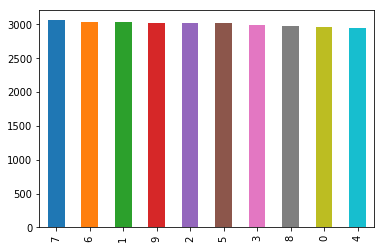

In [32]:
#checking distribution of our dataset
_ = label_train[0].value_counts().plot(kind='bar')
plt.show()

In [33]:
# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = label_train[0].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

get_classes_distribution(data_train)

Sneaker             :   3053 or 10.176666666666668%
Shirt               :   3035 or 10.116666666666667%
Trouser             :   3022 or 10.073333333333332%
Ankle Boot          :   3014 or 10.046666666666667%
Pullover            :   3011 or 10.036666666666667%
Sandal              :   3008 or 10.026666666666667%
Dress               :   2984 or 9.946666666666665%
Bag                 :   2966 or 9.886666666666667%
T-shirt/top         :   2960 or 9.866666666666667%
Coat                :   2947 or 9.823333333333334%


picked-up labels:  [0 3 7 ... 7 0 1]

Randomly picked-up images from the training dataset


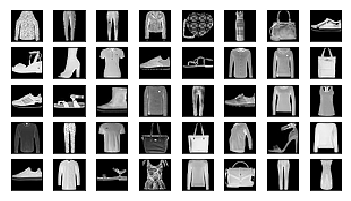

''

In [34]:
#Randomly picked-up images from the training dataset

def display_digits(N):
    """Picks-up randomly N images within the 
    train dataset between 0 and 30000 and displays the images
    with 4 images/row"""
    
    train = data_train
    images = np.random.randint(low=0, high=30000, size=N).tolist()
    
    subset_images = train.iloc[images,:]
    subset_images.index = range(1, N+1)
    print("picked-up labels: ", label_train[0].values)

    print("\nRandomly picked-up images from the training dataset")
    for i, row in subset_images.iterrows():
        
        plt.subplot((N//8)+1, 8, i)
        pixel = row.values.reshape((28,28))
        plt.imshow(pixel, cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.show()

    return ""

display_digits(40)

In [35]:
#data_train = data_train.values.reshape((data_train.shape[0], 28, 28))
#print(data_train.shape, label_train.shape)

In [36]:
#plt.figure()
#plt.imshow(data_train[2], cmap=plt.get_cmap('gray'))
#plt.title("class " + str(label_train.at[2,0]) + ": T-shirt/Top" )
#plt.colorbar()
#plt.grid(False)
#plt.show()

In [37]:
# using H['datatest'], H['labeltest'] for test dataset.

with h5py.File('images_testing.h5','r') as H:
    data_test = np.copy(H['datatest'])
with h5py.File('labels_testing_2000.h5','r') as H:
    label_test = np.copy(H['labeltest'])
    data_test = data_test[0:2000,]

print(data_train.shape,label_train.shape)
print(data_test.shape,label_test.shape)

(30000, 784) (30000, 1)
(2000, 784) (2000,)


Showing a sample data. The first example belongs to class 0: T-Shirt/Top

In [38]:
#data_test = data_test.reshape((data_test.shape[0], 28, 28))
#plt.imshow(data_test[1999], cmap=plt.get_cmap('gray'))
#plt.title("class " + str(label_test[1999]) + ": Trouser" )
#plt.colorbar()
#plt.grid(False)
#plt.show()

# PCA and Feture Engineering

In [39]:
#x_train_std = data_train
#cov = np.cov(x_std.T)
#eigen_vals, eigen_vecs = np.linalg.eig(cov)
#x_train_pca = x_train_std.dot(eigen_vecs.T)

# Data matrix X, assumes 0-centered
n, m = data_train.shape
# Compute covariance matrix
C = np.cov(data_train.T)
# Eigen decomposition
eigen_vals, eigen_vecs = np.linalg.eig(C)
# Project X onto PC space
x_train_pca = np.dot(data_train, eigen_vecs)

In [40]:
import matplotlib.pyplot as plt

# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals[:], reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [41]:
#cum_var_exp
x_train_pca.shape

(30000, 784)

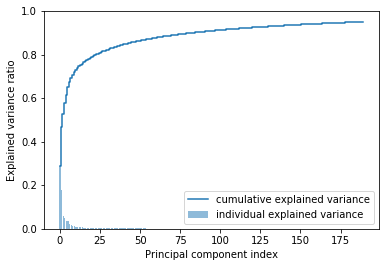

In [43]:
# plot explained variances
plt.bar(range(0,190), var_exp[:190], alpha=0.5, align='center', label='individual explained variance')
plt.step(range(0,190), cum_var_exp[:190], where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [44]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [45]:
#w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
#print('Matrix W:\n', w)

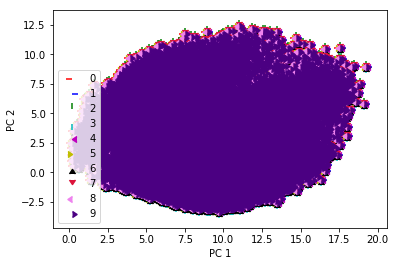

In [46]:
colors = ['r', 'b', 'g', 'c','m','y','k', 'crimson', 'violet','indigo']
markers = [0,1,2,3,4,5,6,7,8,9]
for l, c, m in zip(np.unique(label_train.values), colors, markers):
    plt.scatter(x_train_pca[:,0], 
                x_train_pca[:,1], 
                c=c, label=l, marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

# Prepare our Models

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# intialize pca and logistic regression model
lr = LogisticRegression(multi_class='auto', solver='liblinear')

# fit and transform data
lr.fit(x_train_pca[:,:190], label_train)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
# Data matrix X, assumes 0-centered
n_test, m_test = data_test.shape
# Compute covariance matrix
C_test = np.cov(data_train.T)
# Eigen decomposition
eigen_vals_test, eigen_vecs_test = np.linalg.eig(C)
# Project X onto PC space
x_test_pca = np.dot(data_test, eigen_vecs)

lr.predict(x_test_pca[:,:190])

array([1, 0, 9, ..., 5, 9, 1], dtype=uint8)

In [60]:
lr.score(x_test_pca[:,:190], label_test)

0.8355

In [57]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest
random_forest = RandomForestClassifier(n_estimators=50, random_state = 1)
random_forest.fit(x_train_pca[:,:200], label_train)

Y_prediction = random_forest.predict(x_test_pca[:,:200])

random_forest.score(x_test_pca[:,:200], label_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.8455

### How to output the prediction
Output a file “predicted_labels.h5” that can be loaded in the same way as above. You may use the following code to generate an output file that meets the requirement:

In [84]:
import numpy as np
# assume output is the predicted labels
# (5000,) with h5py.File('predicted_labels.h5','w') as H:
H.create_dataset('output',data=output)

NameError: name 'output' is not defined

We will load the output file using the code for loading data above. It is your responsibility to make sure the output file can be correctly loaded using this code.
The performance of your classifier will be evaluated in terms of the top-1 accuracy metric, i.e.<br /><br />
<div style="text-align: center"> $$\text{Accuracy} = \frac{\text{Number of correct classifications}}{\text{Total number of test examples used}} * 100\%$$

## Task description
Each group consists of 3 students. Your task is to determine / build a classifier for the given data set to classify images into categories and write a report. The score allocation is as follows:
    * Classifier (code): max 20 points
    * Report: max 80 points
Please refer to the rubric in Canvas for detailed marking scheme. The report and the code are to be submitted in Canvas by the due date.<br />
This assignment must be submitted in Python3. Although you are allowed to use external libraries for optimisation and linear algebraic calculations, you are NOT allowed to use external libraries for basic pre-processing or classification. For instance, you are allowed to use scipy.optimize for gradient descent or scipy.linalg.svd for matrix decomposition. However, you are NOT allowed to use sklearn.svm for classification (i.e. you have to implement the classifier yourself). If you have any ambiguity whether you can use a particular library or a function, please refer to Canvas -> Modules -> ”Assignment 1 FAQs” for clarification.

## Instructions to hand in the assignment
### Go to Canvas -> Assignments -> "Assignment 1" and submit 2 files only: the report and the code file.
1) Report (a .pdf file): The report should include each member’s details (student IDs and names)<br />
2) Code (a .ipynb file): The code must be able to be run with the following folder structure:
    - Algorithm (the root folder): Your .ipynb file containing Python code will be placed on this folder when we test and run your code. 
    - Input (a sub-folder under Algorithm): We will copy the test dataset into this Input folder when we test and run your code. Please make sure your code is able to read the test dataset from this Input folder.
    - Output (a sub-folder under Algorithm): Your code must be able to generate a prediction file named “predicted_labels.h5” to be saved in this Output folder. The prediction file should contain predicted labels of the test dataset. We will use your prediction output file for grading purpose.

Since this is a group work, only one student from your group needs to submit all the files which must be named with student ID numbers of all your group members separated by underscores e.g. “SID1xxxx_SID2xxxx_SID3xxxx.pdf”,  “SID1xxxx_SID2xxxx_SID3xxxx.ipynb”.

### Your submission should include the report and the code. 
A plagiarism checker will be used. Clearly provide instructions on how to run your code in the Appendix section of your report.

### The report must clearly show :
    1. Details of your classifier 
    2. The predicted results from your classifier on test examples
    3. Run-time
    4. Hardware and software specifications of the computer that you used for performance evaluation

### A template for writing the report 
Note that you have to strictly follow the format of the template. The maximum length of the report is 20 (including references).

### A penalty of MINUS 20 percent (-20%) for each day after the due date. 
The maximum delay for assignment submission is 5 (five) days, after which assignment will not be accepted.

**You should upload your assignment at least half a day or one day prior to the submission deadline to avoid network congestion**.

Canvas may not be able to handle a large number of submission happening at the same time. If you submit your assignment at a time close to the deadline, a submission error may occur causing your submission to be considered late. Penalty will be applied to late submission regardless of issues. 

### All files required for assignment 1 can be downloaded from Canvas -> Assignments -> Assignment 1
